#  SharedBike_Usage_Prediction

In [35]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from datetime import datetime 

%matplotlib inline

In [36]:
# Importing dataaset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12980 entries, 0 to 12979
Data columns (total 12 columns):
datetime      12980 non-null object
season        12980 non-null int64
holiday       12980 non-null int64
workingday    12980 non-null int64
weather       12980 non-null int64
temp          12980 non-null float64
atemp         12980 non-null float64
humidity      12980 non-null float64
windspeed     12980 non-null float64
casual        12980 non-null int64
registered    12980 non-null int64
count         12980 non-null int64
dtypes: float64(4), int64(7), object(1)
memory usage: 1.1+ MB


In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4399 entries, 0 to 4398
Data columns (total 11 columns):
datetime      4399 non-null object
season        4399 non-null int64
holiday       4399 non-null int64
workingday    4399 non-null int64
weather       4399 non-null int64
temp          4399 non-null float64
atemp         4399 non-null float64
humidity      4399 non-null float64
windspeed     4399 non-null float64
casual        4399 non-null int64
registered    4399 non-null int64
dtypes: float64(4), int64(6), object(1)
memory usage: 360.9+ KB


## Univariate Analysis

C:\Users\Ankit Singh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


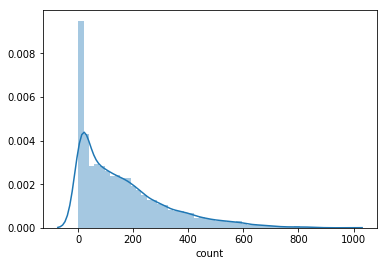

In [39]:
# distribution of count variable
sn.distplot(train["count"])

The distribution is skewed towards right and hence we can take log of the variable and see if the distribution becomes normal.

C:\Users\Ankit Singh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


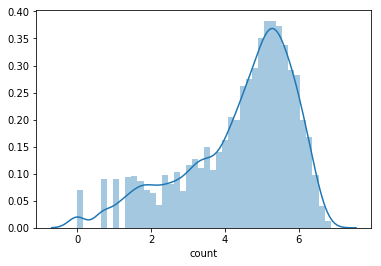

In [40]:
sn.distplot(np.log(train["count"]))

Now the distribution looks less skewed. Let's now explore the variables to have a better understanding of the dataset.

C:\Users\Ankit Singh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


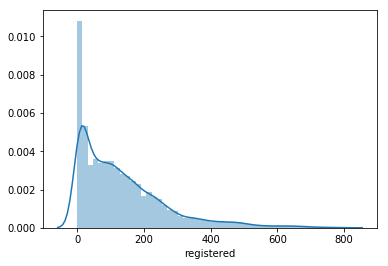

In [41]:
sn.distplot(train["registered"])

We can see that most of the registered rentals lies in the range of 0 to 200. The registered users at a particular time step will always be less than or equal to the demand (count) of that particular timestep.

## Bivariate Analysis

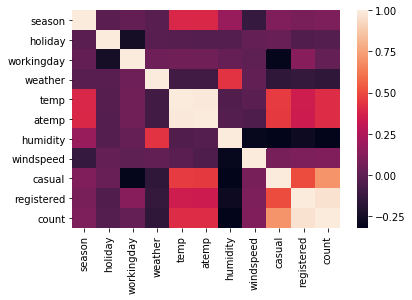

In [42]:
# Plotting correlation map to understand features interdependence
sn.heatmap(train.corr())

### Observations
1. 'temp' and 'atemp' are highly correlated, so one can be removed.
2. 'windspeed' is not very useful but we keep it even with weak correlation
3. 'temp' and 'humidity' have positive & negative correlation w.r.t 'count'.
    Although the correlation between them are not very prominent still the count variable
    has got little dependency on 'temp'and 'humidity'.

In [43]:
# Check for null values in training data
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [44]:
# Check for null values in test data
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
dtype: int64

In [45]:
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(train['datetime'])

In [46]:
# Create additional features that are required
train['hour'] = train['datetime'].dt.hour
train['month']  = train['datetime'].dt.month

test['hour'] = test['datetime'].dt.hour
test['month'] = test['datetime'].dt.month

In [47]:
# Spilt data into training and validation set
training = train[train['datetime'] <= '2012-03-30 0:00:00']
validation = train[train['datetime'] > '2012-03-30 0:00:00']

In [48]:
training.shape

(10774, 14)

In [49]:
validation.shape

(2206, 14)

In [50]:
# Drop columns that are useless or highly correlated to
# another to avoid multicollinearity

training = training.drop(['datetime','atemp'],axis=1)
test = test.drop(['datetime','atemp'],axis=1)
validation = validation.drop(['datetime','atemp'],axis=1)

In [51]:
test.columns,training.columns,test.shape,training.shape

(Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
        'windspeed', 'casual', 'registered', 'hour', 'month'],
       dtype='object'),
 Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
        'windspeed', 'casual', 'registered', 'count', 'hour', 'month'],
       dtype='object'),
 (4399, 11),
 (10774, 12))

In [52]:
test.shape

(4399, 11)

In [53]:
# Create final training and validation sets
train_x = training.drop(['count'],axis = 1)
train_y = np.log(training['count'])
val_x = validation.drop(['count'],axis = 1)
val_y = np.log(validation['count'])

In [54]:
train_x.shape, train_y.shape, val_x.shape, val_y.shape

((10774, 11), (10774,), (2206, 11), (2206,))

##  Create models and choose one that gives lowest RMSLE

## Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [56]:
lin_reg.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
pred = lin_reg.predict(val_x) 
pred.shape,val_y.shape

((2206,), (2206,))

In [58]:
from  sklearn.metrics import mean_squared_log_error
rmsle = np.sqrt(mean_squared_log_error(val_y,pred))
print(rmsle)

0.18379342570222973


## Decision Tree

In [59]:
from sklearn.tree import DecisionTreeRegressor

dec_reg = DecisionTreeRegressor()

In [60]:
dec_reg.fit(train_x,train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [61]:
d_pred = dec_reg.predict(val_x)

In [62]:
d_rmsle = np.sqrt(mean_squared_log_error(val_y,d_pred))
print(d_rmsle)

0.006923860094374967


## SVR

In [69]:
from sklearn.svm import SVR

s_reg = SVR(kernel = 'rbf')

In [70]:
s_reg.fit(train_x,train_y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [71]:
s_pred = s_reg.predict(val_x)

In [72]:
s_rmsle = np.sqrt(mean_squared_log_error(val_y,s_pred))
print(s_rmsle)

0.265716540918473


The SVR is maybe, underfitting because of no feature scaling.
I intend to perform SVR with scaled features whenever I get time,
because SVR is expected to perform better than this.

## Random Forest

In [63]:
from sklearn.ensemble import RandomForestRegressor

r_reg = RandomForestRegressor(n_estimators = 50)

In [64]:
r_reg.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [65]:
r_pred = r_reg.predict(val_x)

In [66]:
r_rsmle = np.sqrt(mean_squared_log_error(val_y,r_pred))
print(r_rsmle)

0.003802519065888291


In [67]:
submission = pd.DataFrame()

test_pred = np.exp(r_reg.predict(test))

In [68]:
submission['count'] = test_pred
submission.to_csv('submission.csv',header = True,index= False)